In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import csv

In [12]:
data = pd.read_csv('data_fe.csv')

**Tách dữ liệu thành tập X và tập y**

In [13]:
X = data.drop('team_win', axis=1)
y = data['team_win']

**Khởi tạo cross-validation**

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

**Khởi tạo bộ scalers**

In [15]:
# Standardization techniques
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()]

**Khởi tạo bộ models thử nghiệm**

In [19]:
models = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42),  
          LinearDiscriminantAnalysis(), MLPClassifier(random_state=42, max_iter = 2000), DecisionTreeClassifier(random_state=42), 
          GaussianNB(), GradientBoostingClassifier(random_state=42)] 

**Thử nghiệm để tìm ra thuật toán tối ưu cho bài toán**

In [20]:
# acc_scores = {}

# # Loop through models and scalers
# for model in models:
#     for scaler in scalers:
#         acc = []
        
#         # Scale the data
#         X_scaled = scaler.fit_transform(X)
        
#         # Loop through folds and calculate average accuracy
#         for train_index, test_index in kf.split(X_scaled):
#             X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
#             y_train, y_test = y[train_index], y[test_index]
            
#             # Train the model
#             model.fit(X_train_scaled, y_train)
            
#             # Make predictions on the testing data
#             y_pred = model.predict(X_test_scaled)
            
#             # Calculate the accuracy of the predictions
#             acc.append(accuracy_score(y_test, y_pred))
        
#         # Append the accuracy score to the list for this model and scaler
#         model_name = f"{type(model).__name__} ({type(scaler).__name__})"
#         acc_scores[model_name] = np.mean(acc)

# # Print the results for each model and scaler
# for model_name, acc in acc_scores.items():
#     print(f"{model_name}: {acc*100:.4f}%")

# # Find the best model and scaler
# best_model_name = max(acc_scores, key=acc_scores.get)
# print(f"Best model and scaler: {best_model_name}, Accuracy: {acc_scores[best_model_name]*100:.4f}%")

# import operator

# # Sort the acc_scores dictionary in descending order based on the accuracy score
# sorted_acc_scores = dict(sorted(acc_scores.items(), key=operator.itemgetter(1), reverse=True))

# # Print the top 10 best model-scaler combinations
# print("Top 10 best model-scaler combinations:")
# i = 1
# for model_name, acc in sorted_acc_scores.items():
#     print(f"{i}. {model_name}: {acc*100:.4f}%")
#     if i == 10:
#         break
#     i += 1

LogisticRegression (MinMaxScaler): 76.9468%
LogisticRegression (MaxAbsScaler): 76.8969%
LogisticRegression (StandardScaler): 76.9768%
LogisticRegression (RobustScaler): 76.9668%
LogisticRegression (Normalizer): 75.2495%
LogisticRegression (QuantileTransformer): 77.0067%
LogisticRegression (PowerTransformer): 76.9369%
RandomForestClassifier (MinMaxScaler): 76.4677%
RandomForestClassifier (MaxAbsScaler): 76.5276%
RandomForestClassifier (StandardScaler): 76.4477%
RandomForestClassifier (RobustScaler): 76.4777%
RandomForestClassifier (Normalizer): 76.0982%
RandomForestClassifier (QuantileTransformer): 76.6075%
RandomForestClassifier (PowerTransformer): 76.4677%
LinearDiscriminantAnalysis (MinMaxScaler): 76.9968%
LinearDiscriminantAnalysis (MaxAbsScaler): 76.9968%
LinearDiscriminantAnalysis (StandardScaler): 76.9968%
LinearDiscriminantAnalysis (RobustScaler): 76.9968%
LinearDiscriminantAnalysis (Normalizer): 75.2495%
LinearDiscriminantAnalysis (QuantileTransformer): 76.8969%
LinearDiscrimin

In [24]:
models = [(QuantileTransformer(), LogisticRegression(random_state=42)), (MinMaxScaler(), LinearDiscriminantAnalysis()) ]
model_names = ["Logistic Regression", "LinearDiscriminantAnalysis"]
dfs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i, model in enumerate(models):
    # Train the model
    X_train = model[0].fit_transform(X_train)
    X_test = model[0].fit_transform(X_test)
    model = model[1]
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    accuracy = model.score(X_test, y_test)
    print(f"{model_names[i]} accuracy on test set: {accuracy*100:.4f}")

    # Predict the win probability for the test set
    win_prob = model.predict_proba(X_test)[:, 1]

    # Convert win probability to win percentage
    win_percentages = win_prob * 100

    # Convert X_test to a DataFrame
    X_test_df = pd.DataFrame(X_test, columns=X.columns)

    # Predict the results on the test set
    y_pred = model.predict(X_test)

    data = []
    for j in range(len(X_test)):
        data.append({
            "gold_difference": X_test_df.iloc[j]["gold_difference"],
            "herald_difference": X_test_df.iloc[j]["herald_difference"],
            "dragon_difference": X_test_df.iloc[j]["dragon_difference"],
            "win_score_difference": X_test_df.iloc[j]["win_score_difference"],
            "turret_difference": X_test_df.iloc[j]["turret_difference"],
            "kda_difference_top": X_test_df.iloc[j]["kda_difference_top"],
            "kda_difference_jungle": X_test_df.iloc[j]["kda_difference_jungle"],
            "kda_difference_mid": X_test_df.iloc[j]["kda_difference_mid"],
            "kda_difference_ad": X_test_df.iloc[j]["kda_difference_ad"],
            "kda_difference_sp": X_test_df.iloc[j]["kda_difference_sp"],
            "blue_win_percentage": win_percentages[j],
            "red_win_percentage": 100 - win_percentages[j]
        })

    # Create a DataFrame from the list of dicts
    df = pd.DataFrame(data)

    # Save the results to a CSV file
    df.to_csv(f"{model_names[i]}.csv", index=False)

Logistic Regression accuracy on test set: 78.0938
LinearDiscriminantAnalysis accuracy on test set: 77.7944


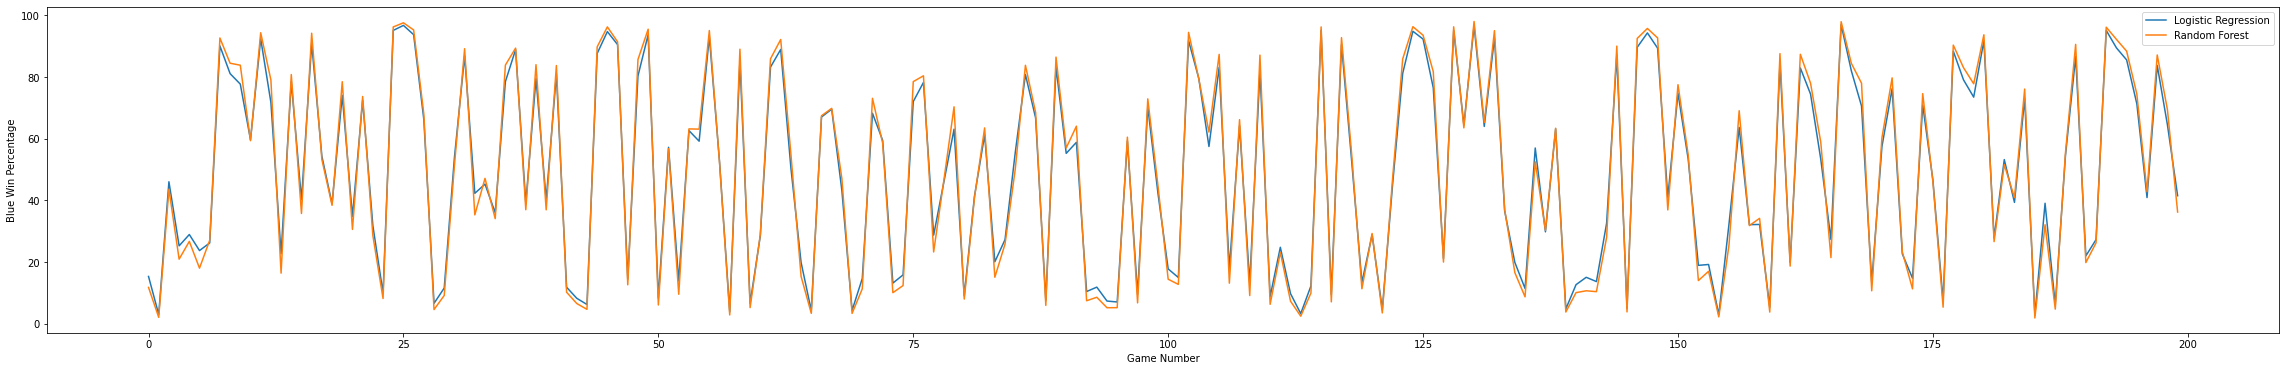

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the four CSV files
data1 = pd.read_csv('Logistic Regression.csv')
data2 = pd.read_csv('LinearDiscriminantAnalysis.csv')

y1 = data1['blue_win_percentage'].head(200)
y2 = data2['blue_win_percentage'].head(200)

# Create a list of x values from 0 to the length of y1
x = list(range(len(y1)))

plt.figure(figsize=(40, 6))

# Plot the four lines on the same graph
plt.plot(x, y1, label='Logistic Regression')
plt.plot(x, y2, label='Random Forest')

# Add a legend to the graph
plt.legend()

# Add labels for the x and y axis
plt.xlabel('Game Number')
plt.ylabel('Blue Win Percentage')

# Show the graph
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# X là dữ liệu đầu vào, y là kết quả đầu ra
# train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy logistic
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
accuracy = lr_model.score(X_test, y_test)
print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy*100:.4f}")

# Dự đoán tỉ lệ thắng của đội blue trong trận đấu mới
win_prob = lr_model.predict_proba(X_test)[:, 1]

# Chuyển đổi xác suất thắng thành tỉ lệ phần trăm
win_percentages = win_prob * 100

# Chuyển X_test thành DataFrame của Pandas
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Dự đoán kết quả trên tập kiểm tra
y_pred = lr_model.predict(X_test)

# Tìm các trận dự đoán sai
wrong_predictions = X_test_df[y_pred != y_test]

# Dự đoán tỉ lệ thắng của đội blue trong các trận dự đoán sai
wrong_win_prob = lr_model.predict_proba(wrong_predictions)[:, 1]

# Chuyển đổi xác suất thắng thành tỉ lệ phần trăm
wrong_win_percentages = wrong_win_prob * 100

data = []
for i in range(len(X_test)):
    data.append({
        "gold_difference": X_test_df.iloc[i]["gold_difference"],
        "herald_difference": X_test_df.iloc[i]["herald_difference"],
        "dragon_difference": X_test_df.iloc[i]["dragon_difference"],
        "turret_difference": X_test_df.iloc[i]["turret_difference"],
        "kda_difference_top": X_test_df.iloc[i]["kda_difference_top"],
        "kda_difference_jungle": X_test_df.iloc[i]["kda_difference_jungle"],
        "kda_difference_mid": X_test_df.iloc[i]["kda_difference_mid"],
        "kda_difference_ad": X_test_df.iloc[i]["kda_difference_ad"],
        "kda_difference_sp": X_test_df.iloc[i]["kda_difference_sp"],
        "blue_win_percentage": win_percentages[i],
        "red_win_percentage": 100 - win_percentages[i]
    })


thresholds = [(0, 100), (5, 95), (10, 90), (15, 85), (20, 80), (25, 75), (30, 70), (35, 65), (40, 60), (45, 55), (50, 50)]

result_previous = 0

total_predictions = len(X_test)
results = []
for t in thresholds:
    threshold_results = len(wrong_predictions[(wrong_win_percentages < t[0]) | (wrong_win_percentages > t[1])]) 
    same_range_count = len(win_percentages[(win_percentages < t[0]) | (win_percentages > t[1])])
    if same_range_count > 0:
        error_rate = threshold_results / same_range_count
    else:
        error_rate = 0
    results.append((t[1], error_rate * 100))

df = pd.DataFrame(results, columns=["Threshold", "Error rate"])
df["Error rate"] = df["Error rate"].round(4)

print(df)

Độ chính xác của mô hình trên tập kiểm tra: 77.2954
    Threshold  Error rate
0         100      0.0000
1          95      1.8727
2          90      2.4119
3          85      5.3333
4          80      8.0376
5          75     10.4987
6          70     12.9430
7          65     15.5161
8          60     17.8224
9          55     20.3390
10         50     22.7046
